# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [3]:
h0 = None 
# Hier eigenen Code schreiben ...
A0 = 10 * 10**6
V = 215 * 10**6
h0 = V*3/A0

In [4]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den Volumenstrom $\dot{V_0}$ (`Vdot0`) in m³/s unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [5]:
u_unten0 = None
Vdot0 = None
# Hier eigenen Code schreiben ...
from math import sqrt, pi

u_unten0 = sqrt(2*9.81*h0)
Vdot0 = 2 * u_unten0

In [6]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [7]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

Beachten Sie, dass sich die Form des Sees [nicht verändert](https://de.wikipedia.org/wiki/Strahlensatz) und somit der oben gegebene Wert für die Oberfläche nur bei vollem See gilt.

In [8]:
from math import pi
def tiefe(V):
    return ((V*3*h0**2)/(pi*r0**2))**(1/3)

In [9]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.

In [12]:
def abfluss(V0, dt):

    werteVolumen = []
    werteZeit = []

    t_n = 0
    V_n = V0
    while V_n > 0:
        tiefe_berechnet = tiefe(V_n)
        if type(tiefe_berechnet) == complex:
            u = 0
        else:
            u = sqrt(2 * 9.81 * tiefe_berechnet)
        v_dot = 2 * u
        V_n = V_n - v_dot * dt
        werteVolumen.append(V_n)
        werteZeit.append(t_n)
        t_n += dt

    return werteVolumen, werteZeit

In [13]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

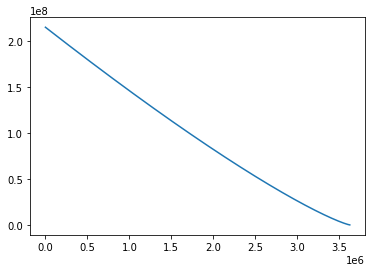

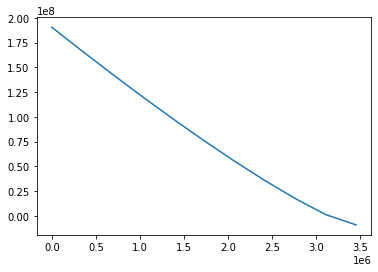

In [14]:
%matplotlib inline
from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)
# Hier eigenen Code schreiben ...
show(plot(abfluss(V,60)[1], abfluss(V,60)[0]))
show(plot(abfluss(V,345600)[1], abfluss(V,345600)[0]))


### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

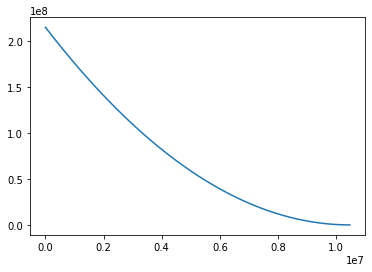

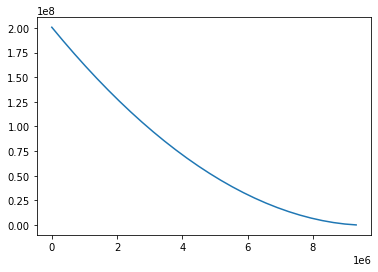

In [16]:
# Hier eigenen Code schreiben ...
def tiefe_zyl(V):
    h = V/(pi*r0**2)
    return h

def abfluss_zyl(V0, dt):

    werteVolumen = []
    werteZeit = []
    t_n = 0
    V_n = V0
    while V_n > 0:
        tiefe_berechnet = tiefe_zyl(V_n)
        if type(tiefe_berechnet) == complex:
            u = 0
        else:
            u = sqrt(2 * 9.81 * tiefe_berechnet)
        v_dot = 2 * u
        V_n = V_n - v_dot * dt
        werteVolumen.append(V_n)
        werteZeit.append(t_n)
        t_n += dt

    return werteVolumen, werteZeit   

show(plot(abfluss_zyl(V,60)[1], abfluss_zyl(V,60)[0]))
show(plot(abfluss_zyl(V,345600)[1], abfluss_zyl(V,345600)[0]))